In [1]:
import numpy as np #used for arrays and numerical functions
import pandas as pd #used for reading a data file
import matplotlib.pyplot as plt #used for graphing
from scipy.optimize import curve_fit #used to find the fit parameters

# Rocket Thrust Vs Time Curve Fitting Project #

Code and Writeup by Scott Colton

The goal of this project was to create a curve fit for thrust data from estes rocket engines. The fit that I used in this project is outlined in a paper, "An Eight-Parameter Function for Simulating Model Rocket Engine Thrust Curves" The equation that they use is a combination of gaussian curves. The equation they use looks like $$ a_1 * e^{-k_1 * ((t-b_1)^2)^{m_1}}  +  a_2 * e^{-k_2 * ((t-b_2)^2)^{m_2}}$$  


## Getting the thrust data ##

The original thrust data that was given to me by my professor, Dr. Titus. The code was tested and refined using data from thrustcurves.org. The data from that website comes in the form of a RASP file that I transfer to a .txt that is read in using pandas.

In [2]:
#This box will be the reading in and assigning of the y data and the x data for the curve fit
df = pd.read_csv('thrust-time-data.txt', sep='\t')

print(df.head())



   t (s)     F (N)
0   0.00  0.521146
1   0.02  1.096904
2   0.04  1.854481
3   0.06  2.763573
4   0.08  4.218120


In [3]:
xdata = df['t (s)']
ydata = df['F (N)']

## Creating the Model ##

The model is fairly straight forward, it is an addition of two gaussians. The construction of the model is done using a cterm that contains the second gaussian. The cterm is only active after the intersection of the two gaussians. This intersection occurs when the data begins to plateau. The t-value where the plateau occurs will have to be added in by the user after viewing the data.

In [41]:
def model(t,a1,k1,b1,m1,a2,b2,k2,m2):
    
    cterm = np.where(t > .28, a2 * np.exp((-k2) * ((t - b2)**2)**m2), 0)
    
    thrust = a1 * np.exp((-k1) * ((t - b1)**2)**m1)  + cterm
    
    return thrust
    
    
tmodel = np.linspace(0,2.5,100)
guess = [9,1,1,1,5,1,1,1]

params, covariance = curve_fit(model, xdata, ydata, p0 = guess)

In [42]:
thmodel = model(tmodel, *params)
params

array([ 7.33325284, 12.42557679,  0.98251201, 16.85224001, -2.74053337,
        1.08905376, 54.41790293,  9.69450987])

Text(0, 0.5, 'Thrust (N)')

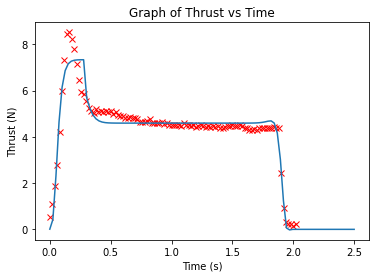

In [46]:
plt.plot(xdata,ydata, 'rx')
plt.plot(tmodel,thmodel)
plt.title('Graph of Thrust vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Thrust (N)')

## Results ##

The code works and does create a fairly accurate model of the thrust curve. The only things that I would change are: I would like to smooth out the curve fit at the peak, and I would like to make the change between no cterm and having a cterm more fluid. Overall, I would call this project a success